<h1> The Challenge:</h1>

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# feel free to import other libraries! 
sns.set()

In [103]:
df = pd.read_csv('states_edu.csv')
METRIC_COLUMN = 'AVG_MATH_4_SCORE'

Chosen test: AVG_MATH_4_SCORE

<h2> Cleanup (optional)</h2>

_Use this space to rename columns, deal with missing data, etc._

In [104]:
# Using the same column naming scheme from the tutorial because the names are intuitive
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)

In [105]:
# Lets see the available columns
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL_ALL_EST', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'ENROLL_PREK', 'ENROLL_KINDER',
       'ENROLL_4', 'ENROLL_8', 'ENROLL_12', 'ENROLL_PRIMARY', 'ENROLL_HS',
       'ENROLL_ALL', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

In [106]:
state_df = df[['STATE', METRIC_COLUMN]].groupby('STATE')

# Let us see how many test scores there are in each category
state_df.agg(['count'])

,AVG_MATH_4_SCORE
,count
STATE,
ALABAMA,11
ALASKA,9
ARIZONA,11
ARKANSAS,11
CALIFORNIA,11
COLORADO,10
CONNECTICUT,11
DELAWARE,10


In [107]:
# Lets see the head of the dataframe
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [108]:
# performs missing data imputation by replacing the ENROLL missing data entries with sums of other enrollemnts
df.ENROLL_ALL = df.ENROLL_ALL.fillna(df.ENROLL_PREK + df.ENROLL_PRIMARY + df.ENROLL_HS)

# in case, there are still NaN, we fill the ENROLL_ALL_EST with the ENROLL_ALL data we just created
df.ENROLL_ALL_EST = df.ENROLL_ALL_EST.fillna(df.ENROLL_ALL)

# gets the number of NaNs per column
df.isna().sum()

PRIMARY_KEY                        0
STATE                              0
YEAR                               0
ENROLL_ALL_EST                    83
TOTAL_REVENUE                    440
FEDERAL_REVENUE                  440
STATE_REVENUE                    440
LOCAL_REVENUE                    440
TOTAL_EXPENDITURE                440
INSTRUCTION_EXPENDITURE          440
SUPPORT_SERVICES_EXPENDITURE     440
OTHER_EXPENDITURE                491
CAPITAL_OUTLAY_EXPENDITURE       440
ENROLL_PREK                      173
ENROLL_KINDER                     83
ENROLL_4                          83
ENROLL_8                          83
ENROLL_12                         83
ENROLL_PRIMARY                   695
ENROLL_HS                        644
ENROLL_ALL                        83
AVG_MATH_4_SCORE                1150
AVG_MATH_8_SCORE                1113
AVG_READING_4_SCORE             1065
AVG_READING_8_SCORE             1153
dtype: int64

In [109]:
# get the funding related columns that we might use for feature selection
FUNDING_COLUMNS = ['TOTAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
                   'FEDERAL_REVENUE', 'SUPPORT_SERVICES_EXPENDITURE',
                   'CAPITAL_OUTLAY_EXPENDITURE', 'INSTRUCTION_EXPENDITURE']
# see if the #N NaNs  that show up in each are in the rows (if it is the same number, then they do)
df[FUNDING_COLUMNS].isna().any(axis=1).sum()

440

In [110]:
# Drop those NaN as well as the NaNs for AVG_MATH_4_SCORE
df = df[df['TOTAL_REVENUE'].notna() & df['AVG_MATH_4_SCORE'].notna()]

In [111]:
# Verify that there are zero NaNs in those columns
df[['TOTAL_REVENUE', 'AVG_MATH_4_SCORE']].isna().sum()

TOTAL_REVENUE       0
AVG_MATH_4_SCORE    0
dtype: int64

In [112]:
# Lets just see the dataframe again
df

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,731634.0,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
2,1992_ARIZONA,ARIZONA,1992,673477.0,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,441490.0,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,5254844.0,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
5,1992_COLORADO,COLORADO,1992,612635.0,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,50648.0,45025.0,34533.0,NaN,NaN,612635.0,221.0,272.0,217.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,2015_VIRGINIA,VIRGINIA,2015,1279867.0,15857524.0,1012205.0,6240349.0,8604970.0,16113212.0,8755896.0,...,96851.0,95221.0,90391.0,772414.0,386781.0,1283590.0,247.0,288.0,229.0,267.0
1220,2015_WASHINGTON,WASHINGTON,2015,1072359.0,13709442.0,1036422.0,8293812.0,4379208.0,13630138.0,6508964.0,...,82404.0,79483.0,89258.0,656797.0,336808.0,1087030.0,245.0,287.0,226.0,267.0
1221,2015_WEST_VIRGINIA,WEST_VIRGINIA,2015,279565.0,3478401.0,362959.0,1979466.0,1135976.0,3466981.0,1819903.0,...,19814.0,20426.0,18432.0,162070.0,80142.0,277452.0,235.0,271.0,216.0,260.0
1222,2015_WISCONSIN,WISCONSIN,2015,861813.0,11637376.0,814385.0,5869265.0,4953726.0,11553677.0,5723474.0,...,60999.0,61084.0,66253.0,489919.0,263896.0,867800.0,243.0,289.0,223.0,270.0


<h2> Feature Selection </h2>

_Use this space to modify or create features_

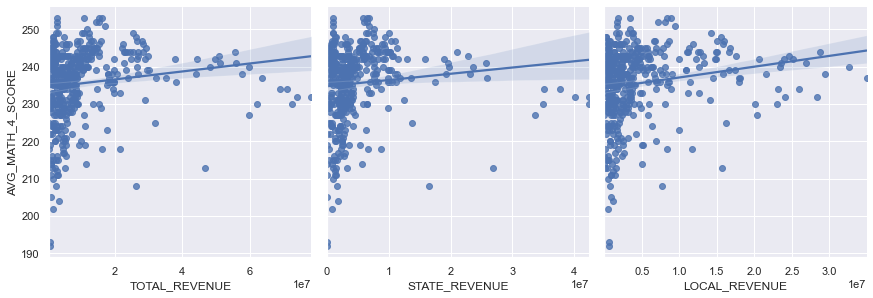

In [113]:
# Pair plots for the first three columns against the Average 4 Grade Math Scores
sns.pairplot(df, x_vars=FUNDING_COLUMNS[0:3], y_vars=METRIC_COLUMN,  kind='reg', height=4)

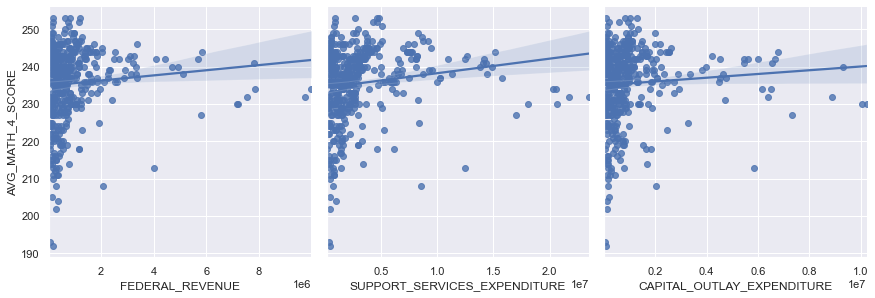

In [114]:
# Pair plots for the last three columns against the Average 4 Grade Math Scores
sns.pairplot(df, x_vars=FUNDING_COLUMNS[3:-1], y_vars=METRIC_COLUMN,  kind='reg', height=4)

Looking at the various scatter Since we are no entirely sure that the data is normal, it is based to assess the data using a nonparametric metric, such as Spearman's rank correlation

In [115]:
df[[*FUNDING_COLUMNS, METRIC_COLUMN]].corr(method='spearman')

,TOTAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,FEDERAL_REVENUE,SUPPORT_SERVICES_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,INSTRUCTION_EXPENDITURE,AVG_MATH_4_SCORE
TOTAL_REVENUE,1.000000,0.977192,0.953835,0.933674,0.995801,0.925391,0.997652,0.229522
STATE_REVENUE,0.977192,1.000000,0.879387,0.926372,0.972536,0.916168,0.972685,0.220150
LOCAL_REVENUE,0.953835,0.879387,1.000000,0.858685,0.950485,0.881429,0.955624,0.228187
FEDERAL_REVENUE,0.933674,0.926372,0.858685,1.000000,0.940529,0.882154,0.928463,0.166295
SUPPORT_SERVICES_EXPENDITURE,0.995801,0.972536,0.950485,0.940529,1.000000,0.917099,0.992878,0.221183
CAPITAL_OUTLAY_EXPENDITURE,0.925391,0.916168,0.881429,0.882154,0.917099,1.000000,0.916308,0.166923
INSTRUCTION_EXPENDITURE,0.997652,0.972685,0.955624,0.928463,0.992878,0.916308,1.000000,0.226769
AVG_MATH_4_SCORE,0.229522,0.220150,0.228187,0.166295,0.221183,0.166923,0.226769,1.000000


However, we can see that though some of the features are correlated well with each other (e.g. LOCAL_REVENUE and FEDERAL_REVENUE), none of them are well correlated with AVG_MATH_4_SCORE. However, revenue and expenditure tell an incomplete picture and it might make sense to reevaluate them in terms of enrollment

In [116]:
# We will use this list to refer to columns that are in terms of per enrolled.
PER_COLUMNS = []

# Iterature over the previous columns
for COLUMN in FUNDING_COLUMNS:
    new_column = '{}_PER_ENROLLED'.format(COLUMN)
    
    # Calculates the column per enrolled
    df[new_column] = df[COLUMN] / df['ENROLL_ALL_EST']
    
    PER_COLUMNS.append(new_column)

In [117]:
df[[*PER_COLUMNS, METRIC_COLUMN]].corr(method='spearman')

,TOTAL_REVENUE_PER_ENROLLED,STATE_REVENUE_PER_ENROLLED,LOCAL_REVENUE_PER_ENROLLED,FEDERAL_REVENUE_PER_ENROLLED,SUPPORT_SERVICES_EXPENDITURE_PER_ENROLLED,CAPITAL_OUTLAY_EXPENDITURE_PER_ENROLLED,INSTRUCTION_EXPENDITURE_PER_ENROLLED,AVG_MATH_4_SCORE
TOTAL_REVENUE_PER_ENROLLED,1.000000,0.705124,0.728422,0.583265,0.961660,0.452186,0.975375,0.624610
STATE_REVENUE_PER_ENROLLED,0.705124,1.000000,0.154444,0.408105,0.679428,0.310606,0.688307,0.529809
LOCAL_REVENUE_PER_ENROLLED,0.728422,0.154444,1.000000,0.276227,0.695987,0.348727,0.729494,0.510576
FEDERAL_REVENUE_PER_ENROLLED,0.583265,0.408105,0.276227,1.000000,0.618490,0.343823,0.544670,0.299445
SUPPORT_SERVICES_EXPENDITURE_PER_ENROLLED,0.961660,0.679428,0.695987,0.618490,1.000000,0.421938,0.929626,0.562370
CAPITAL_OUTLAY_EXPENDITURE_PER_ENROLLED,0.452186,0.310606,0.348727,0.343823,0.421938,1.000000,0.389196,0.286703
INSTRUCTION_EXPENDITURE_PER_ENROLLED,0.975375,0.688307,0.729494,0.544670,0.929626,0.389196,1.000000,0.636188
AVG_MATH_4_SCORE,0.624610,0.529809,0.510576,0.299445,0.562370,0.286703,0.636188,1.000000


Now, we see the spearman correlations involving AVG_MATH_4_SCORE all go up. INSTRUCTION_EXPENDITURE_PER_ENROLLED has the highest coefficient with AVG_MATH_4_SCORE, but it is still relative low.

Because TOTAL_REVENUE_PER_ENROLLED, SUPPORT_SERVICES_EXPENDITURE_PER_ENROLLED, and INSTRUCTION_EXPENDITURE_PER_ENROLLED have high correlation constants, we can assume that we do not necessarily need all of them as features since adding more will provide not add much information. From that set, we will select INSTRUCTION_EXPENDITURE_PER_ENROLLED.

That leaves with INSTRUCTION_EXPENDITURE_PER_ENROLLED, CAPITAL_OUTLAY_EXPENDITURE_PER_ENROLLED, LOCAL_REVENUE_PER_ENROLLED, STATE_REVENUE_PER_ENROLLED, and FEDERAL_REVENUE_PER_ENROLLED, which are still a lot of features.

In [118]:
# List of potential features
potential_features = [
    'INSTRUCTION_EXPENDITURE_PER_ENROLLED',
    'CAPITAL_OUTLAY_EXPENDITURE_PER_ENROLLED',
    'LOCAL_REVENUE_PER_ENROLLED',
    'STATE_REVENUE_PER_ENROLLED',
    'FEDERAL_REVENUE_PER_ENROLLED'
]

Now after looking at the correlation, let us look at the pair plots again for the potential features

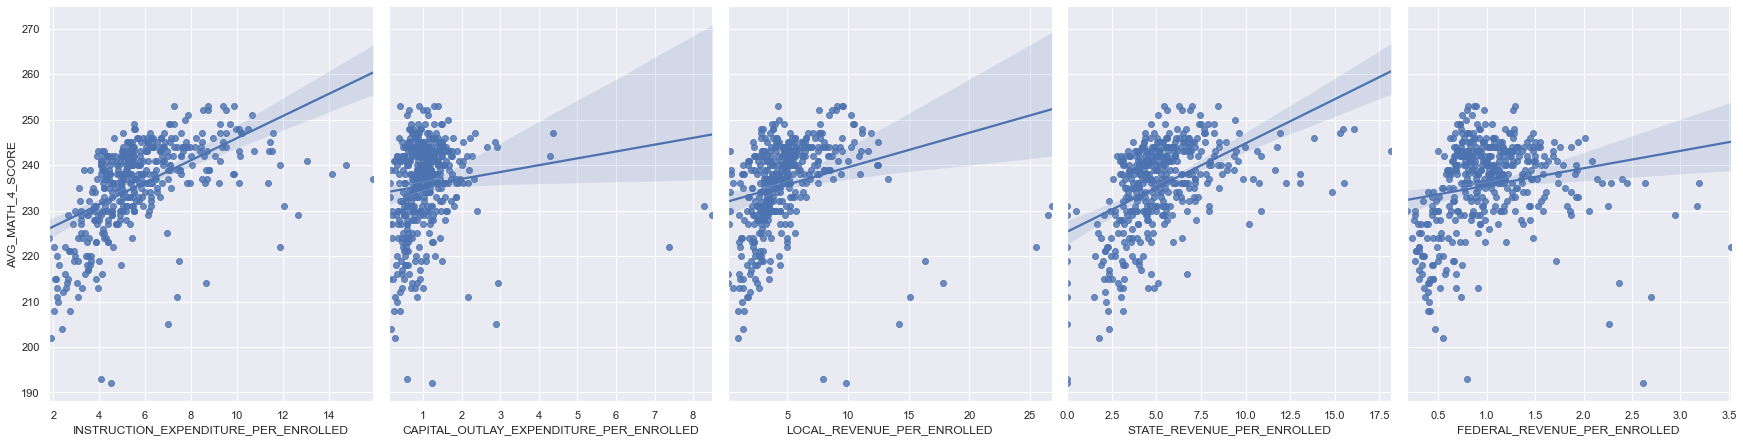

In [119]:
sns.pairplot(df, x_vars=potential_features, y_vars=METRIC_COLUMN, height=6, aspect=.8, kind='reg')

There ar some outliers on some, such as CAPITAL_OUTLAY_EXPENDITURE, so it might help to remove some outliers from the 98 percentile.

Looking at the plots, it might make sense to use a nonlinear regression, such a Support Vector Regression with a nonlinear kernel.

In [120]:
# for i, feature in enumerate(potential_features):
#     q = df[feature].quantile(0.98)
#     df = df[df[feature] < q]
#     sns.lmplot(x=feature, y=METRIC_COLUMN, data=df)


<h2> Data Creation </h2>

Since we will be using the training data to perform feature selection, we will perform the split here

In [121]:
from sklearn.model_selection import train_test_split

# Let us split up the data into training and testin data using the 80/20 ratio
train, test = train_test_split(df, test_size=0.20, random_state=0)

In [122]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestRegressor

# We will be use the Random Forest Regression model because they are optimal for nonlinear data
regression_model = RandomForestRegressor()

# We will RFECV to do the remaining feature selection
model = RFECV(regression_model, step=1, cv=10)

In [123]:
X_train = train[potential_features]
y_train = train[METRIC_COLUMN]

# Trains the model via 10-Fold Validation, determining which features to remove
model.fit(X_train, y_train)

RFECV(cv=10, estimator=RandomForestRegressor())

In [124]:
# Returns a list of boolean values corresponding to RFECV's decision to include the feature or not
model.support_

array([ True, False,  True,  True,  True])

In [125]:
# Uses model.support_ to filter out the potential features to get the final features
final_features = [feature for (feature, support) in zip(potential_features, model.support_) if support]

In [126]:
final_features

['INSTRUCTION_EXPENDITURE_PER_ENROLLED',
 'LOCAL_REVENUE_PER_ENROLLED',
 'STATE_REVENUE_PER_ENROLLED',
 'FEDERAL_REVENUE_PER_ENROLLED']

In [127]:
# Sees how fell it performs on the TRAINING data after removing the features
model.score(X_train, y_train)

0.9444710423475682

Final feature list: **<LIST FEATURES HERE\>**

Feature selection justification: **<BRIEFLY DESCRIBE WHY YOU PICKED THESE FEATURES\>**

<h2> EDA </h2>

Visualization 1

In [128]:
format_label = lambda x: ' '.join([seg.capitalize() for seg in x.split('_')])

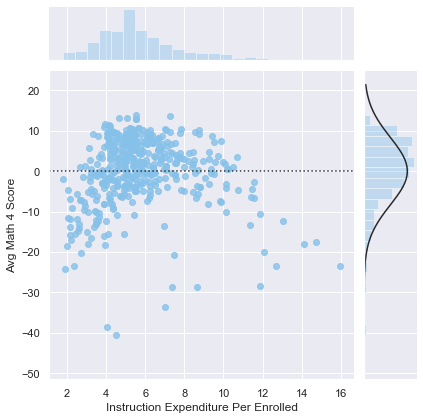

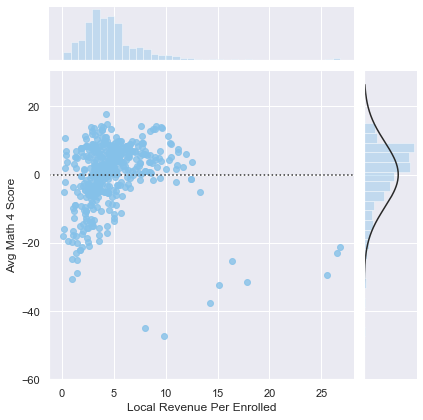

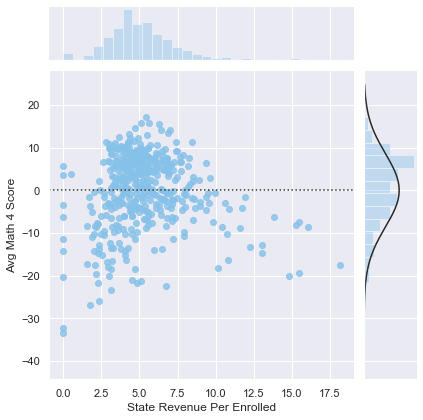

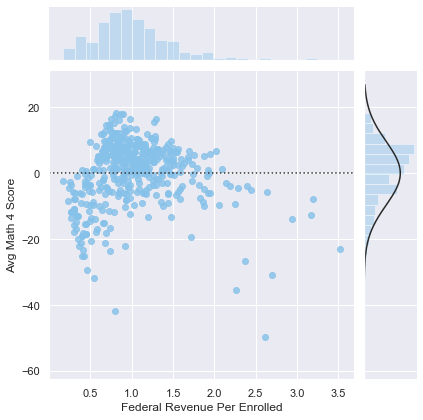

In [129]:
y_series = df[METRIC_COLUMN]
y_series.name = format_label(METRIC_COLUMN)

for i, feature in enumerate(final_features):
    x_series = df[feature]
    x_series.name = format_label(feature)
    
    sns.jointplot(x=x_series, y=y_series, kind="resid", color='#85C1E9')
    


Residue Plots with Distributions included

Visualization 2

Text(0.5, 0, 'Avg Math 4 Score')

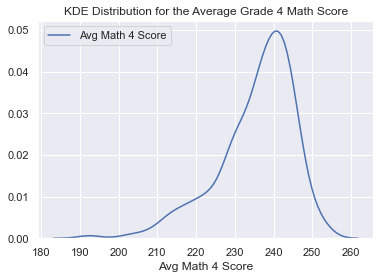

In [130]:
ax = sns.kdeplot(df[METRIC_COLUMN])
ax.set_title('KDE Distribution for the Average Grade 4 Math Score')
ax.set_xlabel(format_label(METRIC_COLUMN))

Distribution of Average Math 4 Scores

<h2> Prediction </h2>

Chosen ML task: Regression (Random Forest)

In [131]:
# Gets the X and y for the testing data
X_test = test[potential_features]
y_test = test[METRIC_COLUMN]

In [132]:
# We can now score the model, which calculates the R2 score
model.score(X_test, y_test)

0.6932834918503257

In [133]:
from sklearn.metrics import r2_score

# Gets the y from prediction the X testing data
y_pred = model.predict(X_test)

# Get the R2 score directly
r2 = r2_score(y_test, y_pred)

# Should be the same as model.score
r2

0.6932834918503257

Although we found the R2 score, it typically increases when the number of training point increase too. As a consequence, we should the Adjusted R2 score as well.

In [134]:
# Gets the number of training data points
n = y_train.shape[0]

# Calculated the Adjusted R2 score
adjusted_r2 = (1 - (1 - r2) * ((n - 1) /  (n - len(final_features) - 1)))
adjusted_r2

0.6897478548687732

The adjusted R2 score and the R2 are not too different.

<h2> Summary </h2>

**<WRITE A PARAGRAPH SUMMARIZING YOUR WORK AND FINDINGS\>**